# Case Study: Sentiment Analysis

Text classification is a machine learning technique that assigns a set of predefined categories to open-ended text. Text classifiers can be used to organize, structure, and categorize pretty much any kind of text – from documents, medical studies and files, and all over the web.

For example, new articles can be organized by topics; support tickets can be organized by urgency; chat conversations can be organized by language; brand mentions can be organized by sentiment; and so on.

Text classification is one of the fundamental tasks in natural language processing with broad applications such as **sentiment analysis**, topic labeling, spam detection, and intent detection.

**Why is Text Classification Important?**

It’s estimated that around 80% of all information is unstructured, with text being one of the most common types of unstructured data. Because of the messy nature of text, analyzing, understanding, organizing, and sorting through text data is hard and time-consuming, so most companies fail to use it to its full potential.

This is where text classification with machine learning comes in. Using text classifiers, companies can automatically structure all manner of relevant text, from emails, legal documents, social media, chatbots, surveys, and more in a fast and cost-effective way. This allows companies to save time analyzing text data, automate business processes, and make data-driven business decisions.

**How Does Text Classification Work?**

Instead of relying on manually crafted rules, machine learning text classification learns to make classifications based on past observations. By using pre-labeled examples as training data, machine learning algorithms can learn the different associations between pieces of text, and that a particular output (i.e., tags) is expected for a particular input (i.e., text). A “tag” is the pre-determined classification or category that any given text could fall into.

The first step towards training a machine learning NLP classifier is feature extraction: a method is used to transform each text into a numerical representation in the form of a vector. One of the most frequently used approaches is bag of words, where a vector represents the frequency of a word in a predefined dictionary of words.

Then, the machine learning algorithm is fed with training data that consists of pairs of feature sets (vectors for each text example) and tags (e.g. sports, politics) to produce a classification model:

![training](https://monkeylearn.com/static/507a7b5d0557f416857a038f553865d1/2ed04/text_process_training.webp)

Once it’s trained with enough training samples, the machine learning model can begin to make accurate predictions. The same feature extractor is used to transform unseen text to feature sets, which can be fed into the classification model to get predictions on tags (e.g., sports, politics):

![prediction](https://monkeylearn.com/static/afa7e0536886ee7152dfa4c628fe59f0/2b924/text_process_prediction.webp)

Text classification with machine learning is usually much more accurate than human-crafted rule systems, especially on complex NLP classification tasks. Also, classifiers with machine learning are easier to maintain and you can always tag new examples to learn new tasks.

In [1]:
"""
(Practical tip) Table of contents can be compiled directly in jupyter notebooks using the following code:
I set an exception: if the package is in your installation you can import it otherwise you download it 
then import it.
"""
try:
    from jyquickhelper import add_notebook_menu 
except:
    !pip install jyquickhelper
    from jyquickhelper import add_notebook_menu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 12.3 MB/s eta 0:00:00


In [2]:
"""
Output Table of contents to navigate easily in the notebook. 
For interested readers, the package also includes Ipython magic commands to go back to this cell
wherever you are in the notebook to look for cells faster
"""
add_notebook_menu()

## 0. Today lab

In this lab we use part of the 'Amazon_Unlocked_Mobile.csv' dataset published by Kaggle. The dataset contain the following information:
* Product Name
* Brand Name
* Price
* Rating
* Reviews
* Review Votes

We are mainly interested by the 'Reviews' (X) and by the 'Rating' (y)

The goal is to try to predict the 'Rating' after reading the 'Reviews'. I've prepared for you TRAIN and TEST set.

## 1. Load and study the dataset

### 1.1. Imports

In [3]:
import pandas as pd
import numpy as np
#import nltk
import pylab as pl # package inheriting most of matplotlib package functions with shorter syntax 
import seaborn as sns 
%matplotlib inline

### 1.2. [About Train, validation and test sets](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7)
![test/train/val](https://miro.medium.com/max/1466/1*aNPC1ifHN2WydKHyEZYENg.png)

* **Training Dataset:** The sample of data used to fit the model.
* **Validation Dataset:** The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.
* **Test Dataset:** The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

In [4]:
TRAIN = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/train.csv.gz")
VAL = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/val.csv.gz")
TEST = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/test.csv.gz")

TRAIN.head(10)#pass an integer value to specify the number of header lines to output. 

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,Samsung Galaxy Note 4 N910C Unlocked Cellphone...,Samsung,449.99,4,I love it!!! I absolutely love it!! 👌👍,0.0
1,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.00,5,I love the BLU phones! This is my second one t...,4.0
2,Apple iPhone 6 128GB Silver AT&T,Apple,599.95,5,Great phone,1.0
3,BLU Advance 4.0L Unlocked Smartphone -US GSM -...,BLU,51.99,4,Very happy with the performance. The apps work...,2.0
4,Huawei P8 Lite US Version- 5 Unlocked Android ...,Huawei,198.99,5,Easy to use great price,0.0
5,"BLU WIN HD LTE - 5.0"" Windows Smartphone -GSM ...",BLU,109.99,5,"Came faster then expected, thanks cellathon. I...",NaN
6,BLU Dash Jr 3G Unlocked Phone - Retail Packagi...,BLU,39.97,1,Phone stopped working within 3 days!!,3.0
7,Samsung Galaxy S6 Edge Plus SM-G928 32GB Black...,samsung,557.49,1,ordered for a new phone and got a used one wit...,0.0
8,"ZTE Axon Pro - Factory Unlocked Phone, 32 GB I...",ZTE,419.99,5,A+,0.0
9,LG G4 Unlocked Smartphone with 32GB Internal M...,LG,324.84,1,"Lots of problems with this phone. There's no ""...",4.0


### 1.3. Understand the train dataset

In [5]:
# Tokenized the reviews
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt') # If nltk requires to download 'punkt' depending on your installation
reviews_tokenized = [word_tokenize(review) for review in TRAIN['Reviews']]
for sentence in reviews_tokenized[:10]: print('%s \n'%sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['I', 'love', 'it', '!', '!', '!', 'I', 'absolutely', 'love', 'it', '!', '!', '👌👍'] 

['I', 'love', 'the', 'BLU', 'phones', '!', 'This', 'is', 'my', 'second', 'one', 'this', 'year', 'and', 'not', 'because', 'there', 'is', 'anything', 'wrong', 'with', 'my', 'BLU', 'Studio', '6.0', 'HD', '.', 'I', 'have', 'just', 'opted', 'to', '``', 'upgrade', "''", 'to', 'a', 'phone', 'with', 'a', 'slightly', 'smaller', 'screen', 'and', 'better', 'battery', 'life', '.', 'For', 'the', 'price', 'of', 'these', 'phones', 'you', 'can', 'not', 'go', 'wrong.1', '.', 'Setup', 'is', 'a', 'breeze2', '.', 'customization', 'is', 'easy3', '.', 'colors', 'are', 'vibrant4', '.', 'phone', 'is', 'light', '(', 'even', 'with', 'a', 'rugged', 'case', ')', '5.', 'battery', 'life', 'is', 'better', 'than', 'any', 'phone', 'I', 'have', 'ever', 'had6', '.', 'Screen', 'is', 'responsive', 'to', 'touch', 'unlike', 'some', 'other', 'phones.I', 'have', 'had', 'no', 'issue', 'with', 'volume', 'or', 'music', 'playback', 'as', 'other'

In [6]:
# Count the vocabulary
flatten_reviews = [item for sublist in reviews_tokenized for item in sublist] # contain all words 
# print(flatten_reviews)
unique_words = list(set(flatten_reviews)) #processed as a list for future analysis
vocabulary_size = len(unique_words) # set allows to get unique words contain in flatten_reviews
vocabulary_size

13099

[('.', 10867), ('the', 8323), ('I', 6743), (',', 6551), ('and', 5429), ('it', 5217), ('phone', 5132), ('a', 4855), ('to', 4682), ('is', 3991), ('for', 2558), ('this', 2403), ('of', 2035), ('!', 1993), ('with', 1992), ('was', 1935), ('in', 1828), ('my', 1796), ('not', 1777), ('that', 1751)]


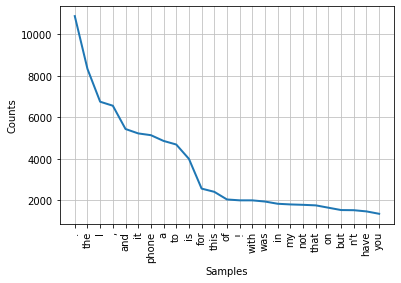

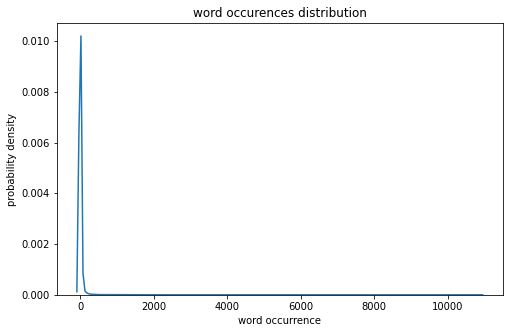

In [7]:
# Plot the distribution of words
from nltk import FreqDist

freqDist = FreqDist(flatten_reviews)
print(freqDist.most_common(20))
full_counts = [x[1] for x in freqDist.most_common()]
freqDist.plot(25, cumulative=False)
pl.show()
pl.figure(figsize=(8,5))
#plot
sns.kdeplot(full_counts)
#labeling features for readibility you have to think about while presenting your results
pl.xlabel('word occurrence'); pl.ylabel('probability density'); pl.title('word occurences distribution')
pl.show()

# most of the time, the most common words are linking words, basic verbs, punctuation
# For instance, One can wonder either rare words are more significant for discriminative purposes.

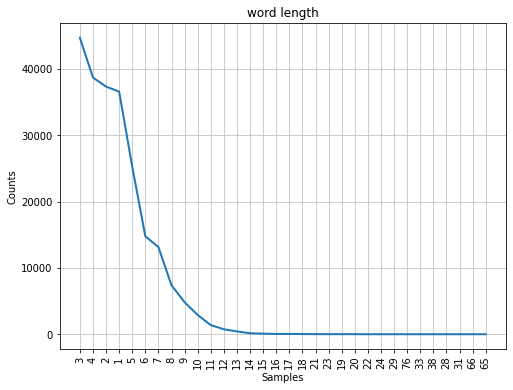

In [8]:
# Plot the distibution of word length size
len_words = [len(w) for w in flatten_reviews]
freqDist2 = FreqDist(len_words)
pl.figure(figsize=(8,6))
pl.title('word length')
freqDist2.plot(cumulative=False)

Text(0.5, 1.0, 'sentence lengths distribution')

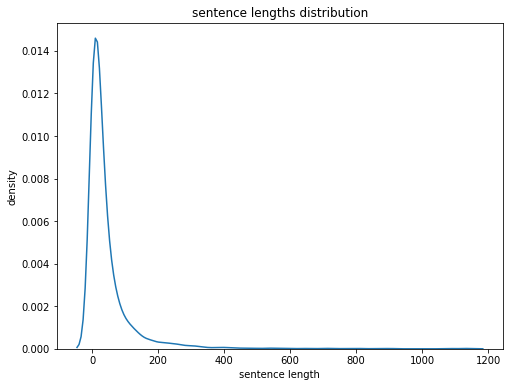

In [9]:
# Plot the distribution of sentence lengths
len_sentences = [len(s) for s in reviews_tokenized]
pl.figure(figsize=(8,6))
sns.kdeplot(len_sentences)
pl.xlabel('sentence length'); pl.ylabel('density');pl.title('sentence lengths distribution')

In [10]:
# Build a function named get_ngrams that return the list of n grams of a text.
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

def get_ngrams(text, n ):
    if len(word_tokenize(text)) < n :
        return []
    n_grams = ngrams(word_tokenize(text), n)
    return [ ' '.join(grams) for grams in n_grams]

# Use this function to output/print the ngrams of the following text
text = "I love the chocolate but I hate tea"

# get_ngrams('This is the simplest text i could think of', 3 )
get_ngrams(text, 3 )

['I love the',
 'love the chocolate',
 'the chocolate but',
 'chocolate but I',
 'but I hate',
 'I hate tea']

In [11]:
# For each reviews calculate its 3grams
ngrams_reviews = [get_ngrams(' '.join(r), 3) for r in reviews_tokenized]
ngrams_reviews[:2]

[['I love it',
  'love it !',
  'it ! !',
  '! ! !',
  '! ! I',
  '! I absolutely',
  'I absolutely love',
  'absolutely love it',
  'love it !',
  'it ! !',
  '! ! 👌👍'],
 ['I love the',
  'love the BLU',
  'the BLU phones',
  'BLU phones !',
  'phones ! This',
  '! This is',
  'This is my',
  'is my second',
  'my second one',
  'second one this',
  'one this year',
  'this year and',
  'year and not',
  'and not because',
  'not because there',
  'because there is',
  'there is anything',
  'is anything wrong',
  'anything wrong with',
  'wrong with my',
  'with my BLU',
  'my BLU Studio',
  'BLU Studio 6.0',
  'Studio 6.0 HD',
  '6.0 HD .',
  'HD . I',
  '. I have',
  'I have just',
  'have just opted',
  'just opted to',
  'opted to ``',
  'to `` upgrade',
  '`` upgrade ``',
  'upgrade `` to',
  '`` to a',
  'to a phone',
  'a phone with',
  'phone with a',
  'with a slightly',
  'a slightly smaller',
  'slightly smaller screen',
  'smaller screen and',
  'screen and better',
  'an

###  1.4. What about your validation split ?

Questions left to the students:

    - Is the vocabulary observed in the validation dataset included in the train dataset?
    - How similar are distributions of word occurences or word lengths?
    - Same for sentence-wise distributions? 

In practice you do not have prior knowledge on the classification labels of the test dataset, and you want to infer these i.e. be able to generalize this categorization based on known labels of the train dataset. So you use the validation dataset to measure the generalization ability of your model learned on the train dataset.

However, you have access to observations from all datasets split (sentences here) in stationary cases (to contrast to online settings where new data comes on the fly).

In [12]:
VAL.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,BLU Tank II T193 Unlocked GSM Dual-SIM Cell Ph...,BLU,26.41,1,Pretty good,0.0
1,"Apple iPhone 5 Unlocked Cellphone, 32GB, White",Apple,265.00,5,"Excellent,very good Very fast",0.0
2,HTC Explorer A310e Unlocked GSM Phone with And...,NaN,79.99,3,This was a replacement. We had a POS Samsung f...,0.0
3,Blackberry 9530 Storm Unlocked For Any GSM Car...,BlackBerry,131.59,1,Was used ! Had to return it,0.0
4,"Nokia E71 Unlocked Phone with 3.2 MP Camera, 3...",Nokia,193.50,3,"Just loved the item, and it was just as the pi...",0.0


In [13]:
"""
Tokenized the reviews of the validation dataset
Code previously used for processing the train dataset fails on the validation dataset
This is a common situation while dealing with real life datasets built by non machine-learning practitioners.
So we also have to know how to preprocess row data.
Common problems contain in real life dataset:
    contain NaN values; values type are not consistent among a given dataset feature etc.. 
"""
run_failure = False#True
if run_failure: #This code will give you an error
    reviews_tokenized_val = [word_tokenize(review) for review in VAL['Reviews']]
    for sentence in reviews_tokenized_val[:10]: print('%s \n'%sentence)
else: # Here for practical reasons we just show how to deal with this issue using exceptions
    reviews_tokenized_val= []
    failed_review=[]
    for review in VAL['Reviews']:
        try: # Store the result of the function word_tokenize applied on current review if it does not fail 
            reviews_tokenized_val.append(word_tokenize(review))
        except:
            failed_review.append(review)
            continue
    print('How many fails over the whole Validation reviews ? ', len(VAL['Reviews']) - len(reviews_tokenized_val))
    print('Look at failures to understand why it happened ? \nlist of bugged reviews: %s'%failed_review)

How many fails over the whole Validation reviews ?  1
Look at failures to understand why it happened ? 
list of bugged reviews: [nan]


In [14]:
# validation vocabulary
flatten_reviews_val = [item for sublist in reviews_tokenized_val for item in sublist]
unique_words_val = list(set(flatten_reviews_val))
vocabulary_size_val = len(unique_words_val)
print('TRAIN dataset - vocabulary size: %s \nVAL dataset - vocabulary size: %s '%(vocabulary_size,vocabulary_size_val))

TRAIN dataset - vocabulary size: 13099 
VAL dataset - vocabulary size: 5067 


In [15]:
# Are words in the VALIDATION reviews contained in the TRAINING ones? 
included_words = []
excluded_words = []
for word in unique_words_val:
    if word in unique_words:
        included_words.append(word)
    else:
        excluded_words.append(word)
print('Number of INCLUDED words: %s \nNumber of EXCLUDED words:%s'%(len(included_words),len(excluded_words)))

Number of INCLUDED words: 3687 
Number of EXCLUDED words:1380


In [16]:
# [TO DO - Students] Plot most frequent words present in the validation dataset

# Count the vocabulary
flatten_reviews_val = [item for sublist in reviews_tokenized_val for item in sublist] # contain all words 
# print(flatten_reviews)
unique_words = list(set(flatten_reviews_val)) #processed as a list for future analysis
vocabulary_size = len(unique_words) # set allows to get unique words contain in flatten_reviews
vocabulary_size

5067

[('.', 10867), ('the', 8323), ('I', 6743), (',', 6551), ('and', 5429), ('it', 5217), ('phone', 5132), ('a', 4855), ('to', 4682), ('is', 3991), ('for', 2558), ('this', 2403), ('of', 2035), ('!', 1993), ('with', 1992), ('was', 1935), ('in', 1828), ('my', 1796), ('not', 1777), ('that', 1751)]


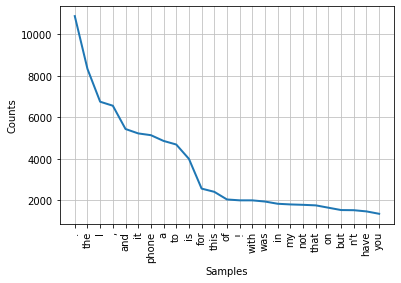

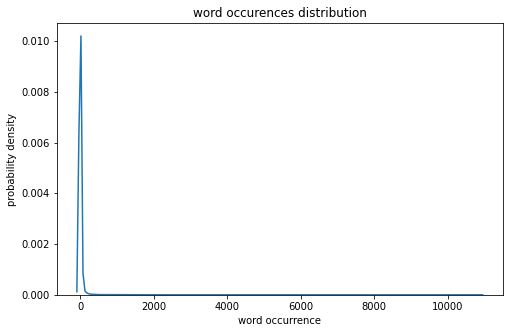

In [17]:
freqDist = FreqDist(flatten_reviews)
print(freqDist.most_common(20))
full_counts_val = [x[1] for x in freqDist.most_common()]
freqDist.plot(25, cumulative=False)
pl.show()
pl.figure(figsize=(8,5))
#plot
sns.kdeplot(full_counts_val)
#labeling features for readibility you have to think about while presenting your results
pl.xlabel('word occurrence'); pl.ylabel('probability density'); pl.title('word occurences distribution')
pl.show()

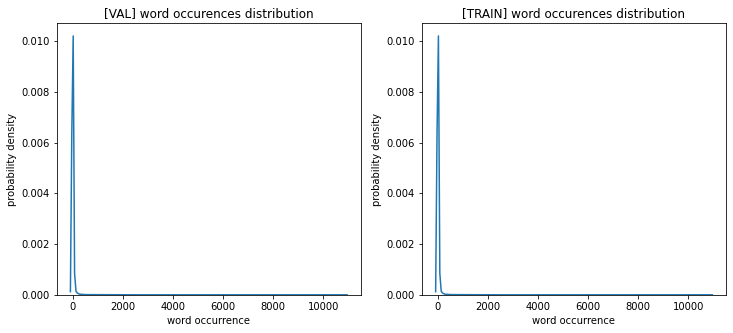

In [18]:
# Plot the distribution of word occurences
## Start with plotting the word occurences with distributions from VAL and TRAIN next to each other
pl.figure(figsize=(12,5))
pl.subplot(121)
sns.kdeplot(full_counts_val)
pl.xlabel('word occurrence'); pl.ylabel('probability density'); pl.title('[VAL] word occurences distribution')
pl.subplot(122)
sns.kdeplot(full_counts)
pl.xlabel('word occurrence'); pl.ylabel('probability density'); pl.title('[TRAIN] word occurences distribution')
pl.show()

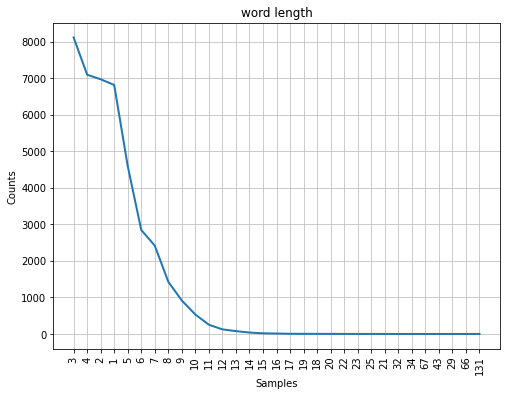

In [19]:
# [TO DO - Students] Then do the same thing for word lengths

len_words_val = [len(w) for w in flatten_reviews_val]
freqDist2 = FreqDist(len_words_val)
pl.figure(figsize=(8,6))
pl.title('word length')
freqDist2.plot(cumulative=False)

Text(0.5, 1.0, 'sentence lengths distribution')

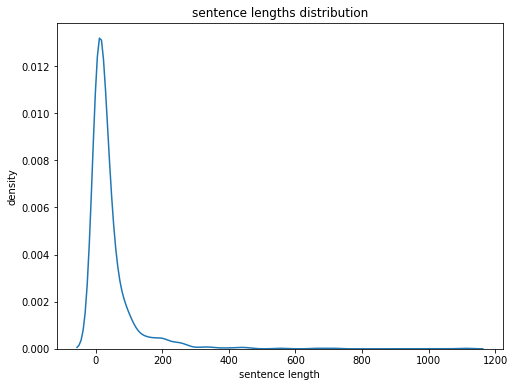

In [20]:
#  [TO DO - Students] Plot the distribution of sentence lengths

len_sentences = [len(s) for s in reviews_tokenized_val]
pl.figure(figsize=(8,6))
sns.kdeplot(len_sentences)
pl.xlabel('sentence length'); pl.ylabel('density');pl.title('sentence lengths distribution')

## 2. Sentence Classifications

### 2.1. Build X (features vectors) and y (labels)

In [27]:
# Construct X_train and y_train
X_train = TRAIN['Reviews'].fillna("")
y_train = TRAIN['Rating']
X_train.shape, y_train.shape

((5000,), (5000,))

In [28]:
# Construct X_val and y_val
X_val = VAL['Reviews'].fillna("")
y_val = VAL['Rating']
X_val.shape, y_val.shape

((1000,), (1000,))

In [29]:
# Construct X_test and y_test
X_test = TEST['Reviews'].fillna("")
y_test = TEST['Rating']
X_test.shape, y_test.shape

((1000,), (1000,))

### 2.2. Build a Baseline
Using a binary `CountVectorizer` and a `LogisticRegression` classifier, learned in a previous lecture, build a first model.

For this model, you will not pre-process the text and will only use words (not N-grams). Leaves all parameter as default.

The evaluation metric is accuracy.

$$[TO DO - Students]$$

Explain in your own words both classification models (CountVectorizer & Logistic Regression), feel free to specify key features/hyperparameters of these models that seem the most important ones to tune and explain why. You can include it at the end of the notebook for your conclusion. 

In [78]:
# Encode X_train
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv.fit(X_train)
X_train_encoded = cv.transform(X_train)
X_train_encoded.shape

(5000, 8991)

In [79]:
# What is the vocabulary size ?
# Compare with your previous response
len(cv.vocabulary_)

8991

In [80]:
cv.fixed_vocabulary_

False

In [81]:
# What is the stop words used
cv.stop_words_


set()

In [82]:
# Transform and then inverse transform the following text
# Interpret the result
text = "I love the chocolate but I hate tea"
transformed = cv.transform([text])

print(transformed)


print(cv.inverse_transform(transformed))

  (0, 1399)	1
  (0, 3797)	1
  (0, 4736)	1
  (0, 7917)	1
[array(['but', 'hate', 'love', 'the'], dtype='<U30')]


In [83]:
# Using LogisticRegression from sklearn, fit a first model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() # Keep default settings we will look into hyperparameters fine-tuning later on
lr.fit(X_train_encoded, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
# Encode X_test
X_test_encoded = cv.transform(X_test)
X_test_encoded.shape

(1000, 8991)

In [85]:
# Using classification_report, evaluate the model
from sklearn.metrics import classification_report

y_pred = lr.predict(X_test_encoded)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.64      0.64      0.64       159
           2       0.16      0.29      0.20        28
           3       0.15      0.21      0.18        52
           4       0.26      0.43      0.33        99
           5       0.90      0.76      0.82       662

    accuracy                           0.67      1000
   macro avg       0.42      0.47      0.44      1000
weighted avg       0.74      0.67      0.70      1000



$$[ TO DO - Students]$$

What do these outputted classification metrics mean? Interpret these results.  You can include it at the end of the notebook for your conclusion. 

### 2.3. A better classifier with a preprocessing

It's up to you. Try to get a better score (accuracy) using what we have seen in this course:
- efficient text pre-processing
- choice of feature extraction
- use of a more powerful classifier or better hyper-parameter for LogisticRegression.

The training of the model must be done on the Train and the evaluation on the Test. You can of course use GridSearchCV or RandomizedSearchCV.

# Some pre-processing

In [99]:
# Write a "clean_text" function that accepts a text as input and returns a clean text.
# The possible steps (take what you want) are:
# - removal of emoji
# - lowercase the text
# - remove punctuation
# - remove words containing numbers
# - remove stop words
# - stemming or lemmatization
# - remove words smaller than nfrom nltk.corpus import stopwords

import string
import re
import nltk
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer().lemmatize
stemmer = PorterStemmer().stem

def clean_text(text):
  # Convert the text to lowercase
  text = text.lower()
  
  # Remove any punctuation
  text = text.translate(text.maketrans("", "", string.punctuation))
  
  # Remove any digits
  text = text.translate(text.maketrans("", "", string.digits))
  
  # Remove any extra white space
  text = " ".join(text.split())
  
  # Remove emojis
  text = re.sub(r"[^\w\s]", "", text)
  
  # Tokenize the text
  tokens = nltk.word_tokenize(text)
  
  # Remove stopwords
  stop_words = set(stopwords.words("english"))
  tokens = [token for token in tokens if token not in stop_words]
  
  # Perform stemming
  # tokens = [stemmer(token) for token in tokens]

  # Perform lemmatization
  tokens = [lemmatizer(token) for token in tokens]

  # Rejoin the tokens into a single string
  text = " ".join(tokens)
  
  return text

In [105]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [106]:
# Clean, X_train and X_test with the previous preprocessing
X_train_cleaned = [clean_text(r) for r in X_train]
X_test_cleaned = [clean_text(r) for r in X_test]

In [107]:
# Build, Fit and Evaluate a model using the previous preprocessing
# Did you improve the result ? 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report

cv = CountVectorizer(analyzer='word', binary=True)
cv.fit(X_train_cleaned)
X_train_encoded = cv.transform(X_train_cleaned)

X_test_encoded = cv.transform(X_test_cleaned)

lr = LogisticRegression()
lr.fit(X_train_encoded, y_train)
y_pred = lr.predict(X_test_encoded)

print(classification_report(y_pred, y_test))

# The results didn't improve in some cases even got worse.

              precision    recall  f1-score   support

           1       0.65      0.62      0.64       168
           2       0.10      0.22      0.14        23
           3       0.14      0.26      0.18        39
           4       0.22      0.38      0.28        94
           5       0.90      0.74      0.81       676

    accuracy                           0.66      1000
   macro avg       0.40      0.44      0.41      1000
weighted avg       0.75      0.66      0.69      1000



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2.4. Search hyper-parameters

![GridSearch](https://i.stack.imgur.com/81Yoo.png)

In [111]:
# Using Grid Search or Random Search try to find some better hyperparameters
from nltk import word_tokenize          
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


# I use my own tokenizer
class MyTokenizer:
    def __call__(self, doc):
        return [clean_text(t) for t in word_tokenize(doc)]

# I define the pipeline
pipeline = Pipeline([
        ('feature_extraction',  TfidfVectorizer(tokenizer=MyTokenizer())),
        ('classification',  LogisticRegression(multi_class='auto', max_iter=400))
        ])

# I define the parameter space
# [TO DO - Students] Set the parameters of your choice for the GridSearchCV

parameters = {
  'feature_extraction__min_df': [1, 2, 3],
  'feature_extraction__max_df': [0.5, 0.75, 1.0],
  # 'feature_extraction__ngram_range': [(1, 1), (1, 2), (1, 3)],
  'classification__C': [0.1, 1, 10],
  'classification__penalty': ['l1', 'l2']
}

# parameters['feature_extraction__...] = [...]
# parameters['feature_extraction__...'] = [...]
# parameters['feature_extraction__...'] = [...]

# parameters['classification__...'] = [...]
# parameters['classification__...'] = [...]


# I use GridSearchCV to search best hyper parameter
# I use RandomizedSearchCV to search good hyper parameter


grid = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=3, verbose=2,n_jobs=None)
grid.fit(X_train, y_train);

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END classification__C=0.1, classification__penalty=l1, feature_extraction__max_df=0.5, feature_extraction__min_df=1; total time=  37.6s
[CV] END classification__C=0.1, classification__penalty=l1, feature_extraction__max_df=0.5, feature_extraction__min_df=1; total time=  37.6s
[CV] END classification__C=0.1, classification__penalty=l1, feature_extraction__max_df=0.5, feature_extraction__min_df=1; total time=  40.3s
[CV] END classification__C=0.1, classification__penalty=l1, feature_extraction__max_df=0.5, feature_extraction__min_df=2; total time=  35.8s
[CV] END classification__C=0.1, classification__penalty=l1, feature_extraction__max_df=0.5, feature_extraction__min_df=2; total time=  36.5s
[CV] END classification__C=0.1, classification__penalty=l1, feature_extraction__max_df=0.5, feature_extraction__min_df=2; total time=  36.3s
[CV] END classification__C=0.1, classification__penalty=l1, feature_extraction__max_df=0.5, 

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
81 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fi

## 3. Summarize your conclusion here

In [112]:
# What is your best params
grid.best_params_

{'classification__C': 1,
 'classification__penalty': 'l2',
 'feature_extraction__max_df': 0.75,
 'feature_extraction__min_df': 1}

In [113]:
# What is your best score
grid.best_score_

0.6635994529785519

In [114]:
# What is your best estimator
grid.best_estimator_

Pipeline(steps=[('feature_extraction',
                 TfidfVectorizer(max_df=0.75,
                                 tokenizer=<__main__.MyTokenizer object at 0x7f51b75add00>)),
                ('classification', LogisticRegression(C=1, max_iter=400))])

A random draw with balanced classes (as much data from each class) would give an accuracy of 20% (1/5). We notice that a very light pre-processing or even no pre-processing already gives much better results (around 65-66%) and that it is not easy to do much better.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


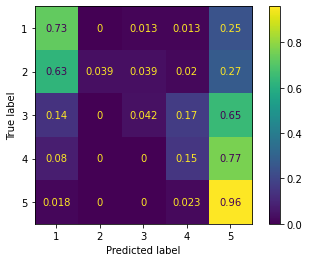

In [123]:
# Print/plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(grid, X_test, y_test, normalize='true');

The confusion matrix helps us understand the quality of the results. On the diagonal we find the quality of the predictions for a given class:
* Class 1 is found around 70 %.
* Class 2, 3 have a low score < 10%.
* Class 4 is found around 16-20 %
* Class 5 is found more than 90 %

On one line is the way the original class was found. For example for class 2 (depend the run) :
* at 59%, the predictor says that a data of this class is of class 1
* at 4% of the right class (the 2)
* at 2% of class 3
* at 4% of class 4
* at 31% of class 5
The sum is 100%.